In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# Step 1
import pandas as pd
root = "https://github.com/TaiChi63/colab/blob/main/pension_data(3).csv"
data = pd.read_csv(root)
x = data["YearsExperience"]
y = data["Salary"]

ParserError: Error tokenizing data. C error: Expected 1 fields in line 41, saw 18


In [24]:
# import time
# while True:
#     time.sleep(4000)

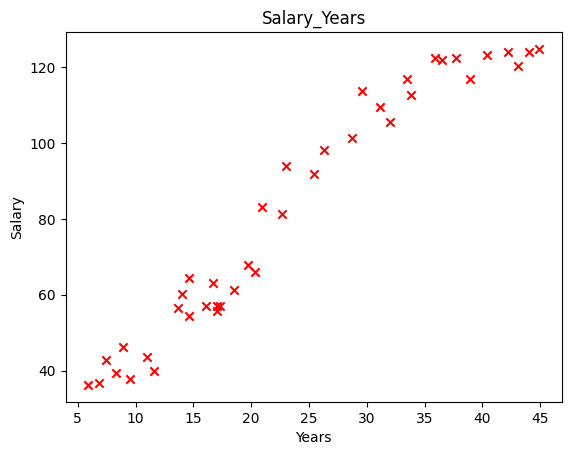

In [25]:
# Step 2
import matplotlib.pyplot as plt
plt.scatter(x, y, marker = "x", color = "red")
plt.title("Salary_Years")
plt.xlabel("Years")
plt.ylabel("Salary")
plt.show()


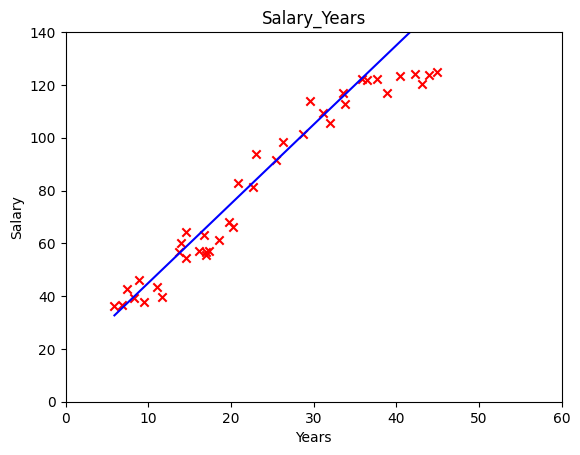

In [26]:
# Step 3
w = 0
b = 0

def plot_pred(w,b):
  y_pred = w * x + b
  plt.plot(x,y_pred,color="blue", label='pred_data')
  plt.scatter(x, y, marker = "x", color = "red", label = 'Real_Data')
  plt.title("Salary_Years")
  plt.xlabel("Years")
  plt.ylabel("Salary")
  plt.xlim([0,60])
  plt.ylim([0,140])
  plt.show()
plot_pred(3,15)

In [27]:
# Step 4
from ipywidgets import interact
interact(plot_pred, w=(-100, 100, 1), b=(-100,100,1))

interactive(children=(IntSlider(value=0, description='w', min=-100), IntSlider(value=0, description='b', min=-…

<function __main__.plot_pred(w, b)>

In [28]:
# Step 5
import pandas as pd
root = "/content/drive/MyDrive/boboai/pension_data(3).csv"
data = pd.read_csv(root)
x=data["YearsExperience"]
y=data["Salary"]
w=3
b=8
y_pred=x*w+b
loss=(y-y_pred)**2
loss.mean()

79.93950000000002

<function matplotlib.pyplot.show(close=None, block=None)>

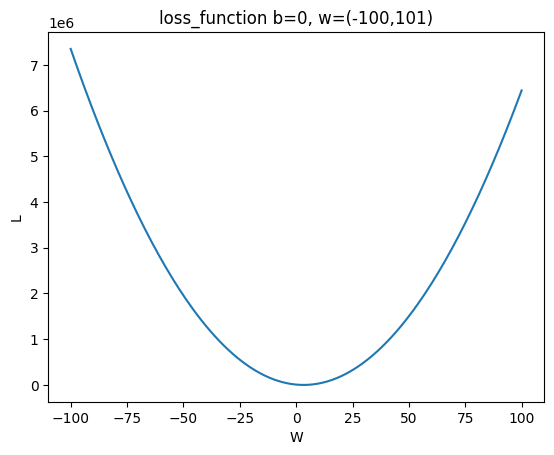

In [29]:
# Step 6 (1)
def compute_loss (x,y,w,b):
  y_pred = x*w+b
  loss=(y-y_pred)**2
  loss = loss.sum()/len(x)
  return loss

losses=[]
for w in range (-100,101):
    loss=compute_loss(x,y,w,0)
    losses.append(loss)
losses

import matplotlib.pyplot as plt
plt.plot(range(-100,101), losses)
plt.title("loss_function b=0, w=(-100,101)")
plt.xlabel("W")
plt.ylabel("L")
plt.show

In [30]:
import numpy as np
ws = np.arange(-100,101)
bs=np.arange(-100,101)
losses = np.zeros((201,201))
i=0
for w in ws:
  j=0
  for b in bs:
    loss = compute_loss(x,y,w,b)
    losses[i,j] = loss
    j=j+1
  i=i+1
losses

array([[7844538.70975, 7839479.73475, 7834422.75975, ..., 6881867.65975,
        6877204.68475, 6872543.70975],
       [7698246.9315 , 7693234.9315 , 7688224.9315 , ..., 6744876.9315 ,
        6740260.9315 , 6735646.9315 ],
       [7553332.62475, 7548367.59975, 7543404.57475, ..., 6609263.67475,
        6604694.64975, 6600127.62475],
       ...,
       [5743593.28075, 5747835.35575, 5752079.43075, ..., 6622530.13075,
        6627168.20575, 6631808.28075],
       [5870040.8595 , 5874329.9095 , 5878620.9595 , ..., 6758278.7595 ,
        6762963.8095 , 6767650.8595 ],
       [5997865.90975, 6002201.93475, 6006539.95975, ..., 6895404.85975,
        6900136.88475, 6904870.90975]])

In [31]:
# Step 6 (2) 1
import numpy as np
ws = np.arange(-100,101)
bs = np.arange(-100,101)
losses = np.zeros((201,201))
i = 0
for w in ws:
  j = 0
  for b in bs:
    loss = compute_loss(x, y, w, b)
    losses[i,j] = loss
    j = j + 1
  i = i + 1
losses

array([[7844538.70975, 7839479.73475, 7834422.75975, ..., 6881867.65975,
        6877204.68475, 6872543.70975],
       [7698246.9315 , 7693234.9315 , 7688224.9315 , ..., 6744876.9315 ,
        6740260.9315 , 6735646.9315 ],
       [7553332.62475, 7548367.59975, 7543404.57475, ..., 6609263.67475,
        6604694.64975, 6600127.62475],
       ...,
       [5743593.28075, 5747835.35575, 5752079.43075, ..., 6622530.13075,
        6627168.20575, 6631808.28075],
       [5870040.8595 , 5874329.9095 , 5878620.9595 , ..., 6758278.7595 ,
        6762963.8095 , 6767650.8595 ],
       [5997865.90975, 6002201.93475, 6006539.95975, ..., 6895404.85975,
        6900136.88475, 6904870.90975]])

72.2895
When w=[3], b=[11], there will be minimum of loss: [72.2895]


<Figure size 1000x1000 with 0 Axes>

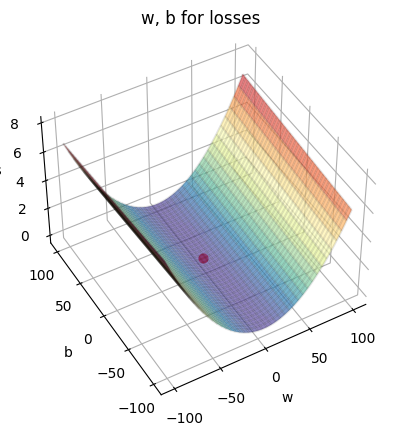

In [32]:
# Step 6 (2) 2
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(45,-120)
ax.xaxis.set_pane_color((1.0,1.0,1.0))
ax.yaxis.set_pane_color((1.0,1.0,1.0))
ax.zaxis.set_pane_color((1.0,1.0,1.0))

b_grid, w_grid = np.meshgrid(bs,ws)

ax.plot_surface(w_grid, b_grid, losses, cmap="Spectral_r", alpha = 0.7)
ax.plot_wireframe(w_grid, b_grid, losses, color="black",alpha=0.1)
ax.set_title("w, b for losses")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("loss")

print(np.min(losses))

w_index, b_index = np.where(losses == np.min(losses))
print(f'When w={ws[w_index]}, b={bs[b_index]}, there will be minimum of loss: {losses[w_index, b_index]}')

ax.scatter(ws[w_index], bs[b_index], losses[w_index,b_index], color="red", s=40)

plt.show()

In [33]:
# Step 7 : Find best value of w and b using gradient descent

In [34]:
# Step 8

import pandas as pd
root = "/content/drive/MyDrive/boboai/pension_data(3).csv"
data = pd.read_csv(root)
x = data["YearsExperience"]
y = data["Salary"]

def compute_gradient(x, y, w, b):
  w_gradient = (x*(w*x+b-y)).mean()
  b_gradient = ((w*x+b-y)).mean()
  return w_gradient, b_gradient
compute_gradient(x,y,10,10)

(4854.300499999999, 163.6375)

In [35]:
# Step 9
def compute_loss(x,y,w,b):
  y_pred = x*w + b
  loss = (y - y_pred)**2
  loss = loss.sum()/len(x)
  return loss

def gradient_descent(x, y, w_init, b_init, learning_rate, loss_function, gradient_function, run_iter=30000, p_iter=1000):
  l_hist = []
  w_hist = []
  b_hist = []
  w = w_init
  b = b_init

  for i in  range(run_iter):
    w_gradient, b_gradient = gradient_function(x, y, w, b)
    w = w - w_gradient*learning_rate
    b = b - b_gradient*learning_rate
    loss = loss_function(x, y, w, b)
    l_hist.append(loss)
    w_hist.append(w)
    b_hist.append(b)
    if i%p_iter == 0:
      print(f"learning {i:5}: loss:{loss:.4e}, w:{w:.2e}, b{b:.2e},w_gradient:{w_gradient:.2e},b_gradient:{b_gradient:.2e}") #.2e represents 10 to the power of 2.
  return w,b,l_hist,w_hist,b_hist

In [36]:
# Step 10
w_init = 0
b_init = 0
learning_rate = 0.001
#run_iter = 30000
run_iter = 60000
p_iter = 1000
w_final,b_final,l_hist,w_hist,b_hist = gradient_descent(x,y,w_init,b_init,learning_rate,compute_loss,compute_gradient,run_iter,p_iter)
print(f"The final value of w:{w_final:.2f},b:{b_final:.2f}")

learning     0: loss:8.4826e+02, w:2.27e+00, b8.12e-02,w_gradient:-2.27e+03,b_gradient:-8.12e+01
learning  1000: loss:1.0363e+02, w:3.17e+00, b3.62e+00,w_gradient:1.08e-01,b_gradient:-3.17e+00
learning  2000: loss:8.7020e+01, w:3.07e+00, b6.50e+00,w_gradient:8.87e-02,b_gradient:-2.60e+00
learning  3000: loss:7.5859e+01, w:2.99e+00, b8.86e+00,w_gradient:7.27e-02,b_gradient:-2.13e+00
learning  4000: loss:6.8359e+01, w:2.93e+00, b1.08e+01,w_gradient:5.96e-02,b_gradient:-1.75e+00
learning  5000: loss:6.3320e+01, w:2.87e+00, b1.24e+01,w_gradient:4.88e-02,b_gradient:-1.43e+00
learning  6000: loss:5.9934e+01, w:2.83e+00, b1.37e+01,w_gradient:4.00e-02,b_gradient:-1.17e+00
learning  7000: loss:5.7659e+01, w:2.79e+00, b1.47e+01,w_gradient:3.28e-02,b_gradient:-9.62e-01
learning  8000: loss:5.6131e+01, w:2.76e+00, b1.56e+01,w_gradient:2.69e-02,b_gradient:-7.89e-01
learning  9000: loss:5.5104e+01, w:2.74e+00, b1.63e+01,w_gradient:2.21e-02,b_gradient:-6.46e-01
learning 10000: loss:5.4413e+01, w:2.72

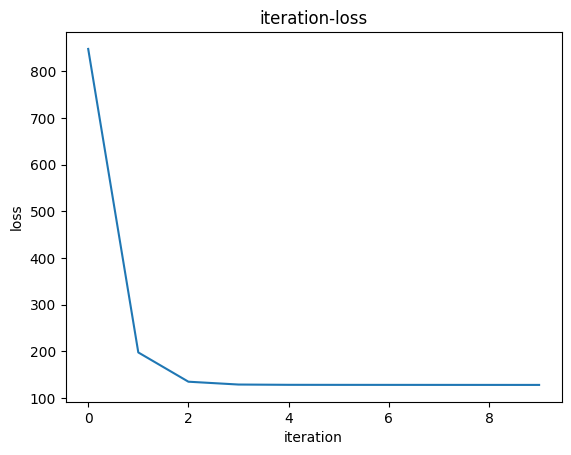

In [37]:
# Step 11
import matplotlib.pyplot as plt
import numpy as np
#plt.plot(np.arange(0,30000),l_hist)
plt.plot(np.arange(0,10),l_hist[:10])
plt.title("iteration-loss")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

learning     0: loss:7.5858e+05, w:-2.65e+01, b-9.75e+01,w_gradient:-7.35e+04,b_gradient:-2.53e+03
learning  1000: loss:1.8498e+03, w:5.87e+00, b-7.54e+01,w_gradient:6.44e-01,b_gradient:-1.89e+01
learning  2000: loss:1.2603e+03, w:5.28e+00, b-5.83e+01,w_gradient:5.28e-01,b_gradient:-1.55e+01
learning  3000: loss:8.6421e+02, w:4.80e+00, b-4.43e+01,w_gradient:4.33e-01,b_gradient:-1.27e+01
learning  4000: loss:5.9806e+02, w:4.41e+00, b-3.28e+01,w_gradient:3.55e-01,b_gradient:-1.04e+01
learning  5000: loss:4.1924e+02, w:4.09e+00, b-2.33e+01,w_gradient:2.91e-01,b_gradient:-8.53e+00
learning  6000: loss:2.9908e+02, w:3.82e+00, b-1.56e+01,w_gradient:2.38e-01,b_gradient:-6.99e+00
learning  7000: loss:2.1835e+02, w:3.61e+00, b-9.25e+00,w_gradient:1.95e-01,b_gradient:-5.73e+00
learning  8000: loss:1.6410e+02, w:3.43e+00, b-4.05e+00,w_gradient:1.60e-01,b_gradient:-4.70e+00
learning  9000: loss:1.2765e+02, w:3.29e+00, b2.07e-01,w_gradient:1.31e-01,b_gradient:-3.85e+00
learning 10000: loss:1.0316e+

<Figure size 1000x1000 with 0 Axes>

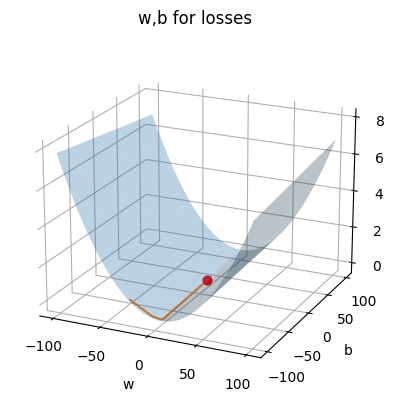

In [38]:
# Step 12
import matplotlib.pyplot as plt
import numpy as np

w_init = -100
b_init = -100
learning_rate = 0.001
run_iter=30000
w_final,b_final,l_hist,w_hist,b_hist=gradient_descent(x,y,w_init,b_init,learning_rate,compute_loss,compute_gradient,run_iter,p_iter)

ws=np.arange(-100,101)
bs=np.arange(-100,101)
losses=np.zeros((201,201))


i=0
for w in ws:
  j=0
  for b in bs:
    loss=compute_loss(x,y,w,b)
    losses[i,j]=loss
    j=j+1
  i=i+1
plt.figure(figsize=(10,10))
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.view_init(20,-65)
ax.xaxis.set_pane_color((1.0,1.0,1.0))
ax.yaxis.set_pane_color((1.0,1.0,1.0))
ax.zaxis.set_pane_color((1.0,1.0,1.0))

b_grid, w_grid=np.meshgrid(bs,ws)
ax.plot_surface(w_grid,b_grid,losses,alpha=0.3)
ax.set_title("w,b for losses")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("loss")

print(np.min(losses))
w_index,b_index=np.where(losses==np.min(losses))
print(f"When w={ws[w_index]},b={bs[b_index]}, there will be minimum of loss:{losses[w_index,b_index]}")

ax.scatter(ws[w_index],bs[b_index],losses[w_index,b_index],color="red",s=40)

ax.plot(w_hist,b_hist,l_hist)
plt.show()

In [39]:
# Step 13
print(f"When year experience x = 5.6, the corresponding pension fund y is {w_final*5.6+b_final:.2f}")
print(f"When year experience x = 15, the corresponding pension fund y is {w_final*15+b_final:.2f}")

When year experience x = 5.6, the corresponding pension fund y is 34.04
When year experience x = 15, the corresponding pension fund y is 58.81
